<a href="https://colab.research.google.com/github/erickgt00/tesina/blob/main/Tesina_EG_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo predictivo para evaluar la viabilidad de préstamos empresariales de acuerdo a su riesgo de crédito y su garantía inmobiliaria

         Cluster  RiesgoCredito  TipoInmueble     Tamano     Duenos  \
count  30.000000      30.000000     30.000000  30.000000  30.000000   
mean    1.333333      55.000000     69.000000  55.000000  42.833333   
std     1.124441      35.477045     21.908902  16.609096  19.682100   
min     0.000000      15.000000     35.000000  40.000000  30.000000   
25%     0.000000      15.000000     42.500000  40.000000  30.000000   
50%     1.000000      50.000000     85.000000  40.000000  30.000000   
75%     2.000000     100.000000     85.000000  75.000000  65.000000   
max     3.000000     100.000000     85.000000  75.000000  80.000000   

         CostoM2      Valor   Habitado   Posesion  Ubicación  ...  Servicios  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  ...  30.000000   
mean   50.333333  61.666667  54.333333  34.000000  43.166667  ...  26.333333   
std    12.452207  17.036135  34.309276   9.321832  15.673574  ...  28.129422   
min    40.000000  30.000000  10.000000  

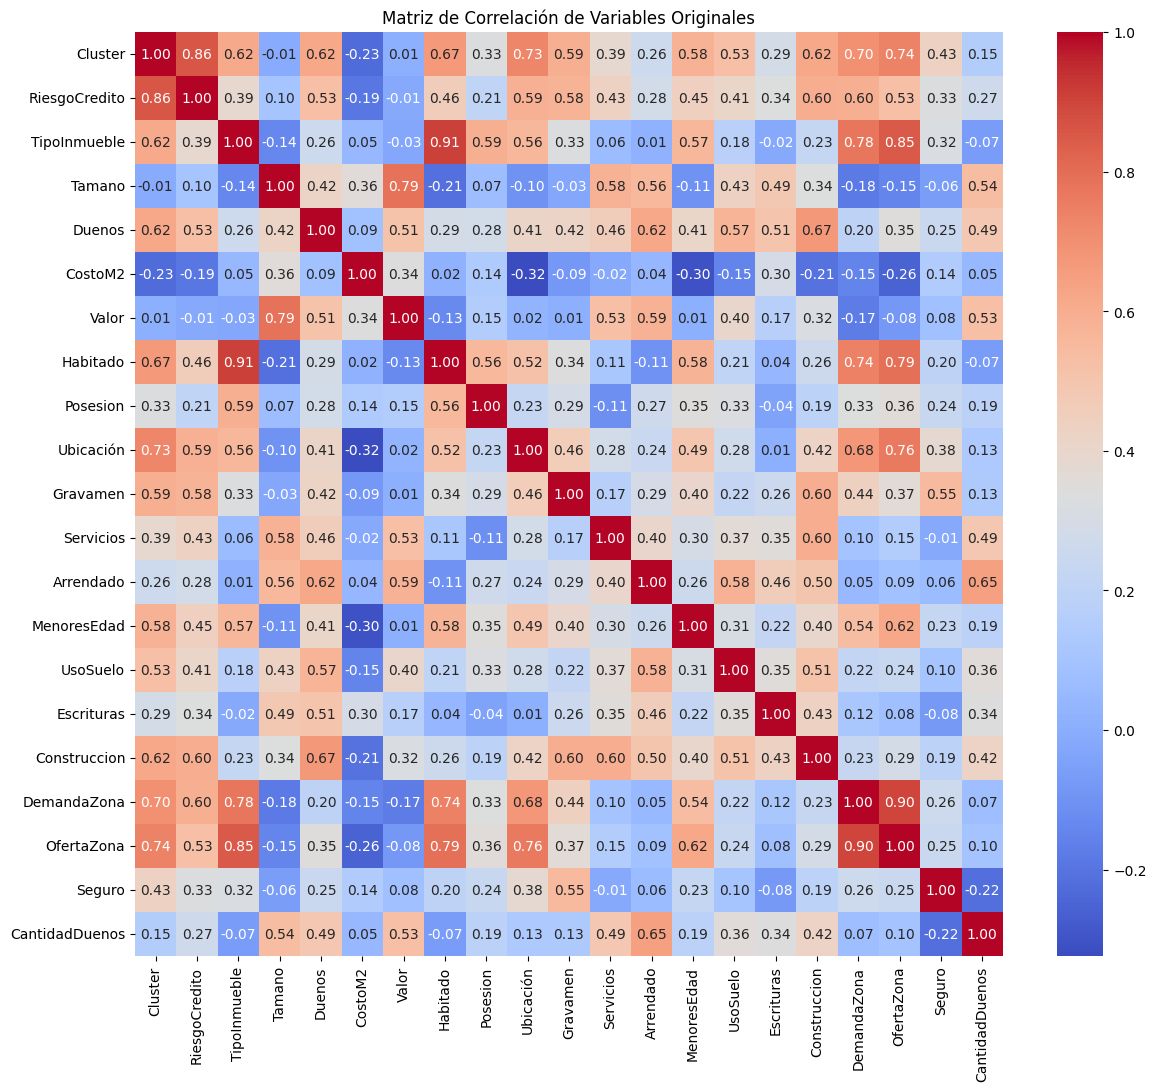

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV con los 30 datos originales
file_path_csv = 'BaseDatosSofoms.csv'
original_data_df = pd.read_csv(file_path_csv)

# Descripción estadística de los datos originales
description = original_data_df.describe()

# Calcular la matriz de correlación
correlation_matrix = original_data_df.corr()

# Matriz de correlación
print(description)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Originales')
plt.show()


## Puntos Clave de la Matriz de Correlación:
###Correlación con "Cluster":

* RiesgoCredito: 0.86 (Fuerte correlación positiva)
* TipoInmueble: 0.62 (Fuerte correlación positiva)
* Habitado: 0.67 (Fuerte correlación positiva)
* Ubicación: 0.73 (Fuerte correlación positiva)
* DemandaZona: 0.70 (Fuerte correlación positiva)
* OfertaZona: 0.74 (Fuerte correlación positiva)

### Otras Correlaciones Notables:

* TipoInmueble y Habitado: 0.91 (Fuerte correlación positiva)
* DemandaZona y OfertaZona: 0.90 (Fuerte correlación positiva)
* Duenos y Construccion: 0.67 (Moderada correlación positiva)

### Interpretación:

* Cluster muestra una fuerte correlación positiva con variables como RiesgoCredito, TipoInmueble, Habitado, Ubicación, DemandaZona, y OfertaZona, indicando que estas variables influyen significativamente en la categorización de los proyectos.
* TipoInmueble y Habitado tienen una fuerte correlación positiva entre sí, lo que sugiere que los tipos de inmueble están relacionados con si están habitados o no.
* DemandaZona y OfertaZona también tienen una fuerte correlación positiva, lo que indica que estas dos variables están estrechamente relacionadas en los datos.

### Creación de los 50k datos sintéticos

In [2]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import RandomForestClassifier

# Obtener la matriz de covarianza de los datos originales
covariance_matrix = EmpiricalCovariance().fit(original_data_df)

# Generar datos sintéticos
synthetic_data = np.random.multivariate_normal(
    mean=original_data_df.mean(),
    cov=covariance_matrix.covariance_,
    size=50000
)

# Convertir los datos sintéticos a un DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data, columns=original_data_df.columns)

print(synthetic_data_df.head())

    Cluster  RiesgoCredito  TipoInmueble     Tamano     Duenos    CostoM2  \
0  1.346781      52.814423     64.786322  82.049311  57.915827  63.740118   
1  4.811310     158.678431    104.398192  41.318768  72.564495  48.807159   
2  2.818498     108.904384     89.443751  45.345498  35.344881  65.531143   
3  1.466217      53.501746     82.826846  60.211184  48.122728  54.714409   
4  2.321778     119.541885     57.630204  63.871381  59.821313  40.369178   

       Valor    Habitado   Posesion  Ubicación  ...  Servicios  Arrendado  \
0  83.805825   37.039782  30.932745  24.918313  ...  44.196627  50.093360   
1  48.431577  108.774758  43.264412  54.951428  ...  34.599038  38.296879   
2  43.238110  113.224174  25.699058  45.592899  ...  73.135776  12.645438   
3  69.470110   64.289884  42.231827  55.061459  ...  36.067694  45.336872   
4  47.625115   55.074946  34.573184  32.751072  ...  39.038527  34.340959   

   MenoresEdad   UsoSuelo  Escrituras  Construccion  DemandaZona  OfertaZo

In [3]:
# Mapeo de valores de riesgo para cada variable basado en las variables originales
value_mappings = {
    'Cluster': [0, 1, 2, 3],
    'RiesgoCredito': [15, 50, 100],
    'TipoInmueble': [85, 65, 35, 40],
    'Tamano': [75, 65, 40],
    'Duenos': [30, 60, 80, 40],
    'CostoM2': [70, 40, 60],
    'Valor': [30, 50, 80],
    'Habitado': [80, 10],
    'Posesion': [20, 40],
    'Ubicación': [20, 35, 55, 75],
    'Gravamen': [20, 50],
    'Servicios': [10, 20, 30, 40, 50, 60],
    'Arrendado': [20, 50],
    'MenoresEdad': [30, 50],
    'UsoSuelo': [20, 80],
    'Escrituras': [20, 30],
    'Construccion': [30, 65],
    'DemandaZona': [30, 85],
    'OfertaZona': [35, 50],
    'Seguro': [20, 70],
    'CantidadDuenos': [50, 75]
}

# Función para ajustar valores al valor más cercano disponible en el mapeo
def adjust_to_closest_value(series, valid_values):
    return series.apply(lambda x: min(valid_values, key=lambda y: abs(y - x)))

# Ajustar cada columna a los valores discretos correspondientes
for column, valid_values in value_mappings.items():
    synthetic_data_df[column] = adjust_to_closest_value(synthetic_data_df[column], valid_values)

print(synthetic_data_df.head())

   Cluster  RiesgoCredito  TipoInmueble  Tamano  Duenos  CostoM2  Valor  \
0        1             50            65      75      60       60     80   
1        3            100            85      40      80       40     50   
2        3            100            85      40      40       70     50   
3        1             50            85      65      40       60     80   
4        2            100            65      65      60       40     50   

   Habitado  Posesion  Ubicación  ...  Servicios  Arrendado  MenoresEdad  \
0        10        40         20  ...         40         50           30   
1        80        40         55  ...         30         50           50   
2        80        20         55  ...         60         20           50   
3        80        40         55  ...         40         50           50   
4        80        40         35  ...         40         20           50   

   UsoSuelo  Escrituras  Construccion  DemandaZona  OfertaZona  Seguro  \
0        80       

In [4]:
# Guardar los datos ajustados en un archivo CSV
adjusted_synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df.to_csv(adjusted_synthetic_data_file_path, index=False)

print(f'Datos ajustados guardados en: {adjusted_synthetic_data_file_path}')

Datos ajustados guardados en: corrected_synthetic_data_final.csv


            Cluster  RiesgoCredito  TipoInmueble        Tamano        Duenos  \
count  50000.000000   50000.000000  50000.000000  50000.000000  50000.000000   
mean       1.358500      55.087700     66.921200     55.810100     45.255000   
std        0.985148      31.559638     17.587756     14.408969     15.682343   
min        0.000000      15.000000     35.000000     40.000000     30.000000   
25%        1.000000      15.000000     65.000000     40.000000     30.000000   
50%        1.000000      50.000000     65.000000     65.000000     40.000000   
75%        2.000000     100.000000     85.000000     65.000000     60.000000   
max        3.000000     100.000000     85.000000     75.000000     80.000000   

            CostoM2         Valor     Habitado      Posesion     Ubicación  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean      51.307000     60.585200     52.73780     33.385200     43.231400   
std       11.517656     17.481294     34.1342

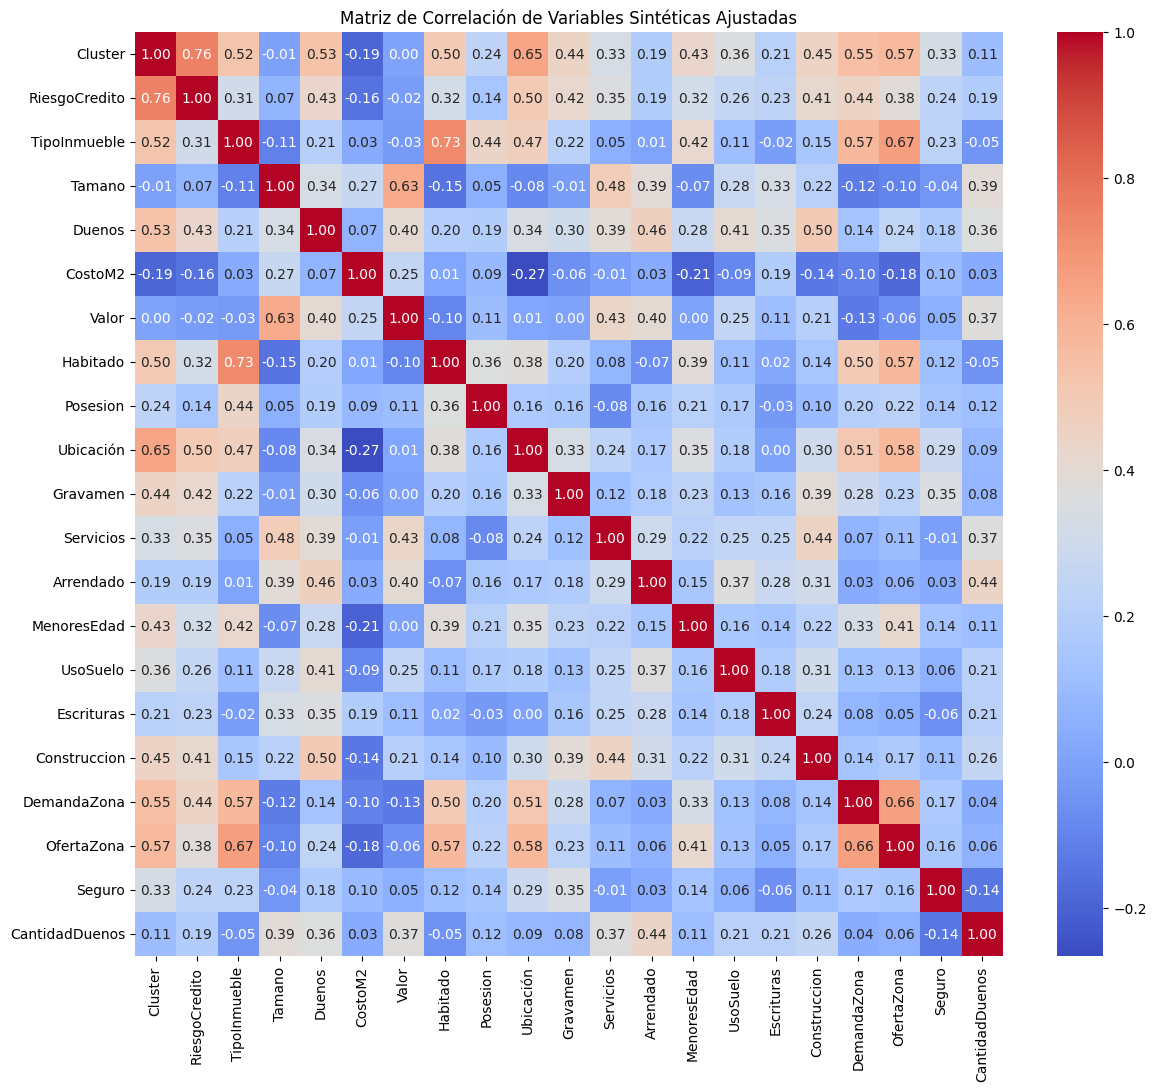

In [5]:
# Recalcular las estadísticas descriptivas y la matriz de correlación después del ajuste
adjusted_synthetic_description_final = synthetic_data_df.describe()
adjusted_synthetic_correlation_matrix_final = synthetic_data_df.corr()

# Mostrar la descripción y la matriz de correlación ajustada
print(adjusted_synthetic_description_final)
plt.figure(figsize=(14, 12))
sns.heatmap(adjusted_synthetic_correlation_matrix_final, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Sintéticas Ajustadas')
plt.show()


###Correlación con "Cluster" VS Datos Originales:

* RiesgoCredito: 0.86 VS 0.76
* TipoInmueble: 0.62 Vs 0.52
* Habitado: 0.67 VS 0.50
* Ubicación: 0.73 0.64
* DemandaZona: 0.70 VS 0.54
* OfertaZona: 0.74 0.57

De lo anterior podemos concluir que efectivamente siguen propiedades muy similares con los datos originales

#Modelo de Predicción

In [6]:
import pandas as pd

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
original_data_file_path = 'BaseDatosSofoms.csv'

# Leer los datos
synthetic_data_df = pd.read_csv(synthetic_data_file_path)
original_data_df = pd.read_csv(original_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

X_test = original_data_df.drop(columns=['Cluster'])
y_test = original_data_df['Cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: RandomForest
Exactitud: 0.8666666666666667
Matriz de confusión:
[[8 1 0 0]
 [1 7 0 0]
 [0 1 6 0]
 [0 0 1 5]]


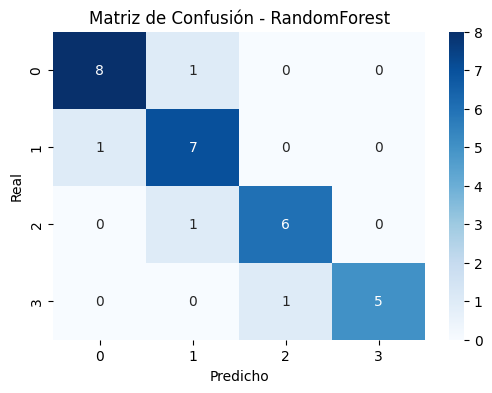

Modelo: LogisticRegression
Exactitud: 0.7
Matriz de confusión:
[[7 2 0 0]
 [3 5 0 0]
 [0 0 7 0]
 [0 0 4 2]]


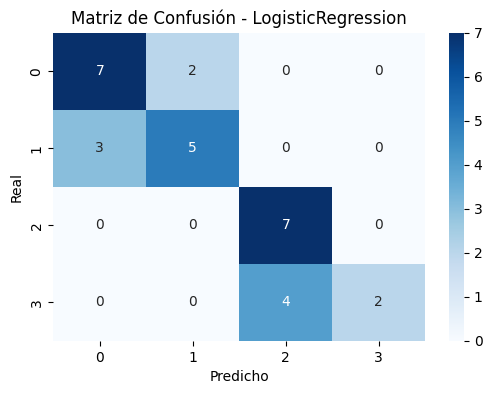

Modelo: SVM
Exactitud: 0.8
Matriz de confusión:
[[8 1 0 0]
 [3 5 0 0]
 [0 1 5 1]
 [0 0 0 6]]


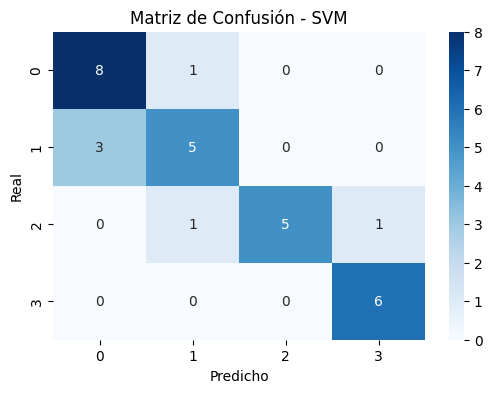

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True)  # Habilitar probability=True
}

# Entrenar y evaluar los modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'confusion_matrix': cm,
        'accuracy': accuracy
    }

# Mostrar los resultados
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud: {result['accuracy']}")
    print("Matriz de confusión:")
    print(result['confusion_matrix'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

### Importancia de las características

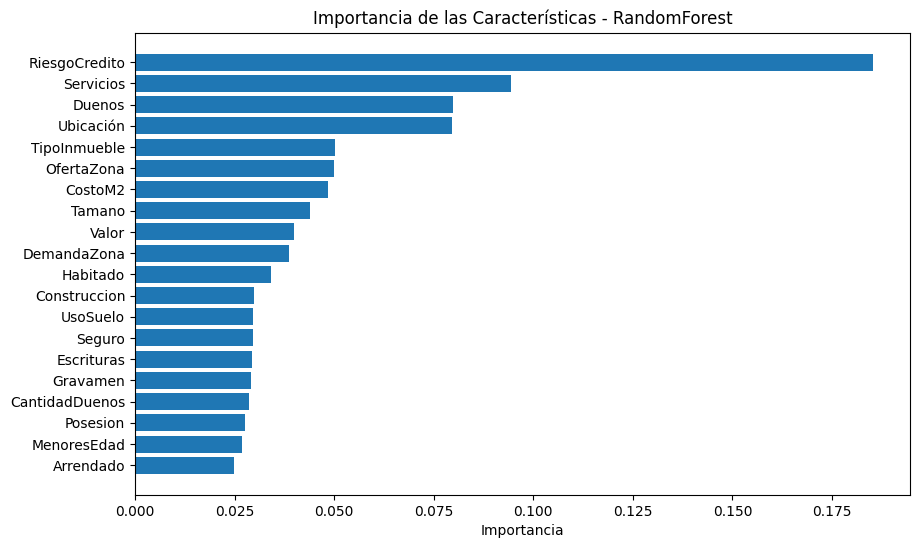

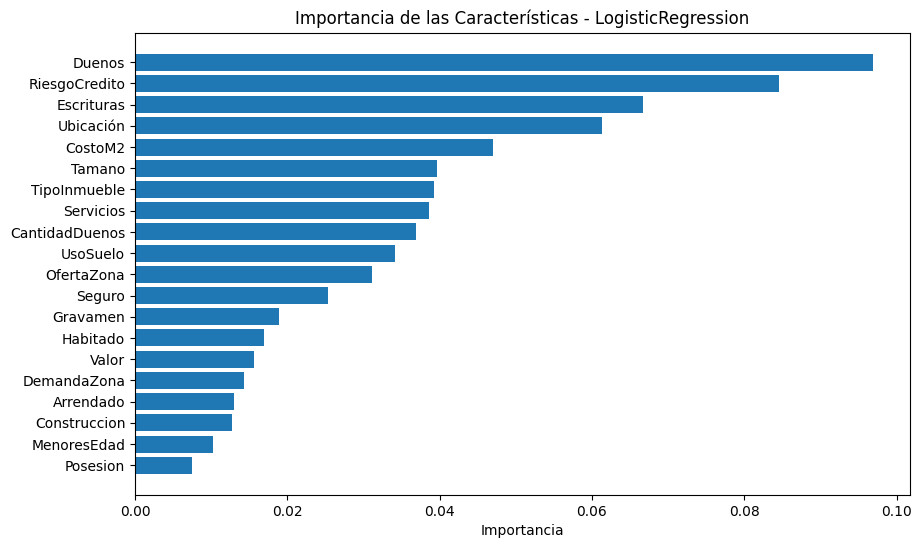

In [8]:
# Analizar la importancia de las características
def plot_feature_importances(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Importancia de las Características - {model_name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Importancia')
        plt.gca().invert_yaxis()
        plt.show()
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 6))
        plt.title(f'Importancia de las Características - {model_name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Importancia')
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print(f"El modelo {model_name} no soporta la extracción de importancias de características.")

# Nombrar características
feature_names = X_train.columns

# Graficar la importancia de las características para RandomForest, LogisticRegression y SVM lineal
for name, result in results.items():
    if name in ['RandomForest', 'LogisticRegression']:
        plot_feature_importances(result['model'], feature_names, name)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


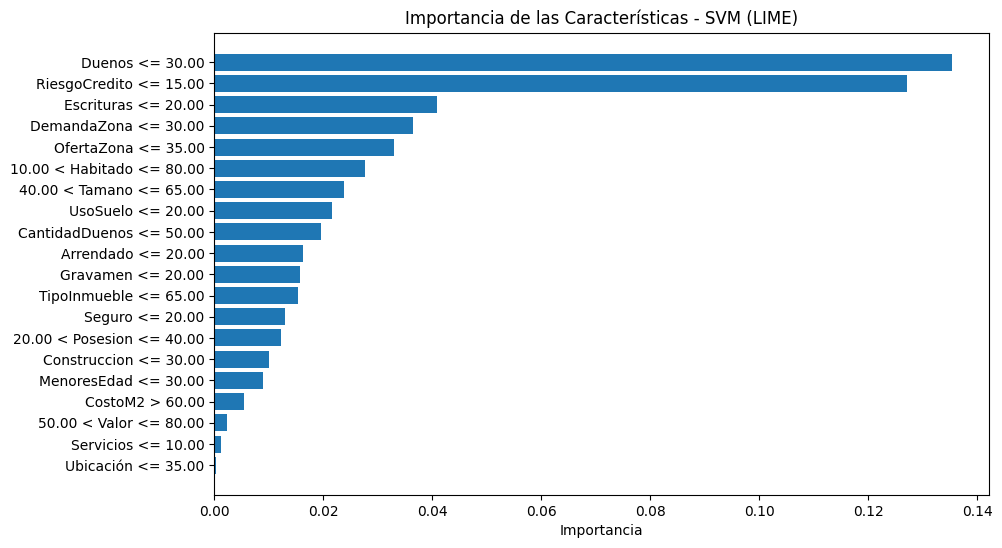

In [9]:
# Usar LIME para calcular la importancia de las características para un SVM no lineal
if 'SVM' in results:
    explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['Clase 0', 'Clase 1'], discretize_continuous=True)
    i = 0  # Ejemplo de la primera instancia en el conjunto de prueba
    exp = explainer.explain_instance(X_test.values[i], results['SVM']['model'].predict_proba, num_features=len(feature_names))
    exp.show_in_notebook(show_table=True, show_all=False)

    # Obtener las importancias de LIME y graficarlas
    lime_importances = dict(exp.as_list())
    lime_importances = {k: abs(v) for k, v in lime_importances.items()}  # Convertir a valores absolutos
    sorted_importances = sorted(lime_importances.items(), key=lambda item: item[1], reverse=True)

    features = [item[0] for item in sorted_importances]
    importances = [item[1] for item in sorted_importances]

    plt.figure(figsize=(10, 6))
    plt.title('Importancia de las Características - SVM (LIME)')
    plt.barh(range(len(importances)), importances, align='center')
    plt.yticks(range(len(importances)), features)
    plt.xlabel('Importancia')
    plt.gca().invert_yaxis()
    plt.show()

### Posibles Conclusiones y Sobreajuste
* Exactitud encima del 80%: En RandomForest y SVM nos dieron una exactitud por encima del 80% lo cual puede ser una señal de sobreajuste (overfitting), especialmente considerando que los datos de entrenamiento fueron generados sintéticamente y podrían no representar todas las variabilidades del mundo real.

* Generalización: Un modelo sobreajustado puede funcionar extremadamente bien en los datos de entrenamiento y prueba disponibles, pero puede fallar al generalizar a nuevos datos no vistos. Dado que los datos de prueba son solo 30 instancias y los datos de entrenamiento son 50,000 instancias sintéticas, existe la posibilidad de que los modelos hayan aprendido características específicas de los datos sintéticos que no se generalizan bien.

###¿Qué podemos hacer?
* Validación Cruzada: Implementar validación cruzada (cross-validation) para evaluar el desempeño del modelo en múltiples subconjuntos de los datos. Esto ayuda a garantizar que el modelo generalice bien y no esté sobreajustado.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Modelo: RandomForest
Exactitud media: 0.70174
Desviación estándar de la exactitud: 0.004801916284151568


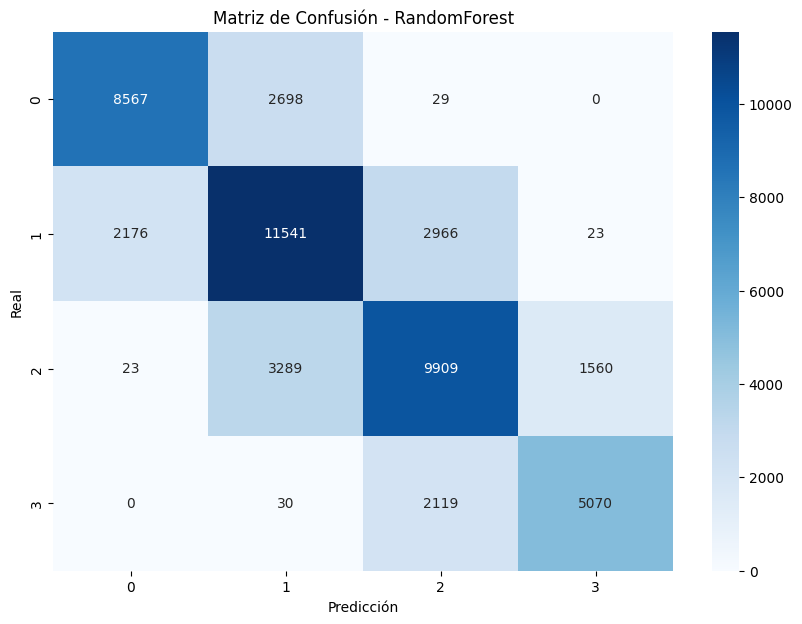

Modelo: LogisticRegression
Exactitud media: 0.7308200000000001
Desviación estándar de la exactitud: 0.004461120935370399


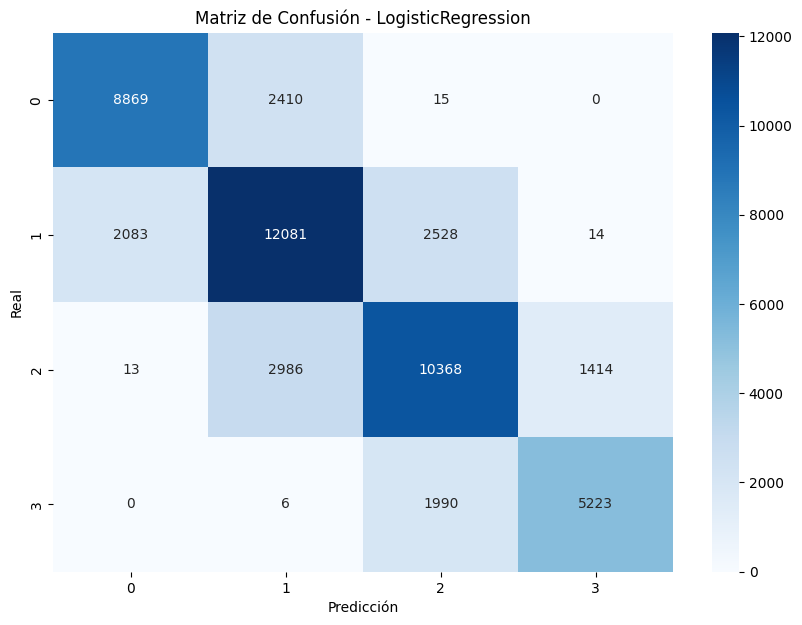

Modelo: SVM
Exactitud media: 0.73426
Desviación estándar de la exactitud: 0.0064164164453377115


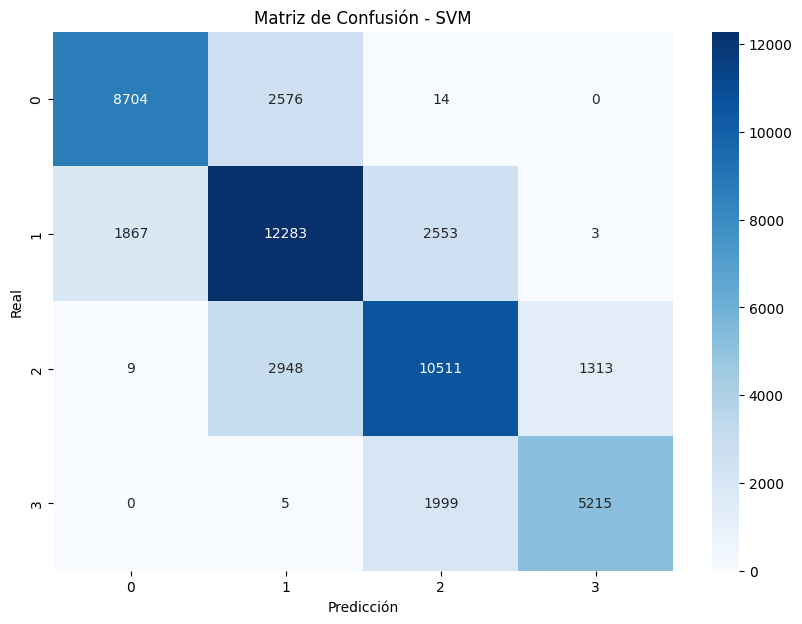

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Evaluar los modelos con validación cruzada
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)  # Predicciones de validación cruzada
    cm = confusion_matrix(y_train, y_pred)  # Matriz de confusión

    cv_results[name] = {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std(),
        'confusion_matrix': cm
    }

# Mostrar los resultados de la validación cruzada y las matrices de confusión
for name, result in cv_results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud media: {result['mean_accuracy']}")
    print(f"Desviación estándar de la exactitud: {result['std_accuracy']}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


Como podemos ver, los 3 modelos arrojaron una presición encima del 70% en la validación cruzada por lo que podemos inferir que tiene una buena y gran probabilidad de predecir correctamente la clasificación que buscamos

#Predecir un nuevo cliente

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df = pd.read_csv(synthetic_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

# Entrenar el modelo seleccionado (en este caso, RandomForest por su mejor desempeño)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Función para predecir el cluster de un nuevo cliente
def predecir_cluster(nuevo_cliente):
    # Convertir el nuevo cliente a un DataFrame
    nuevo_cliente_df = pd.DataFrame([nuevo_cliente])

    # Realizar la predicción
    cluster_predicho = model.predict(nuevo_cliente_df)[0]

    # Agregar el cluster predicho a los datos del nuevo cliente
    nuevo_cliente['Cluster'] = cluster_predicho

    # Agregar el nuevo cliente a la base de datos
    global synthetic_data_df
    synthetic_data_df = pd.concat([synthetic_data_df, pd.DataFrame([nuevo_cliente])], ignore_index=True)

    # Guardar la base de datos actualizada
    synthetic_data_df.to_csv(synthetic_data_file_path, index=False)

    return cluster_predicho

In [13]:
# Cliente nuevo
nuevo_cliente = {
    'RiesgoCredito': 100,
    'TipoInmueble': 85,
    'Tamano': 65,
    'Duenos': 40,
    'CostoM2': 70,
    'Valor': 80,
    'Habitado': 80,
    'Posesion': 40,
    'Ubicación': 55,
    'Gravamen': 20,
    'Servicios': 10,
    'Arrendado': 30,
    'MenoresEdad': 90,
    'UsoSuelo': 20,
    'Escrituras': 20,
    'Construccion': 30,
    'DemandaZona': 60,
    'OfertaZona': 60,
    'Seguro': 20,
    'CantidadDuenos': 50
}

cluster_predicho = predecir_cluster(nuevo_cliente)
print(f'El nuevo cliente ha sido asignado al cluster: {cluster_predicho}')

El nuevo cliente ha sido asignado al cluster: 2
